In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def imshows(images, titles=[], clean=False):
    """Show images, with titles (optional)"""

    fig, axes = plt.subplots(1, len(images), figsize=(15,15))
    if clean:
        for ax in axes:
            ax.set_xticks([])
            ax.set_yticks([])
    for i, image in enumerate(images):
        if(len(image.shape) == 3):
            axes[i].imshow(image)
        else:
            axes[i].imshow(image, plt.cm.gray)
        if titles:
            axes[i].set_title(titles[i])

    plt.show()

In [3]:
def imshow(image, title=''):
    """Show image, with title (optional)"""
    if(len(image.shape) == 3):
        plt.imshow(image)
    else:
        plt.imshow(image, plt.cm.gray)
    if title:
        plt.title(title)

    plt.show()

# Bài 1.

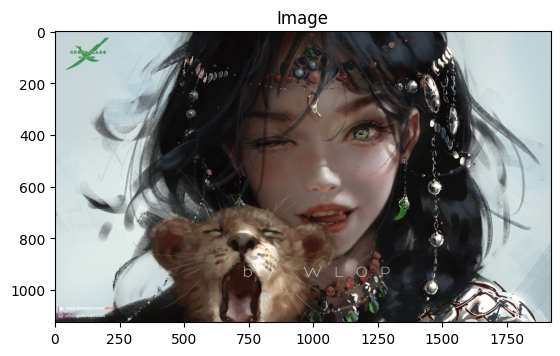

In [4]:
img = plt.imread('images/wlop.jpg')
imshow(img, 'Image')

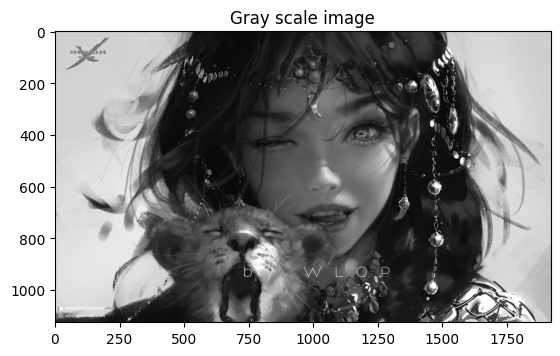

In [5]:
# Create gray scale image
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
imshow(img_gray, 'Gray scale image')

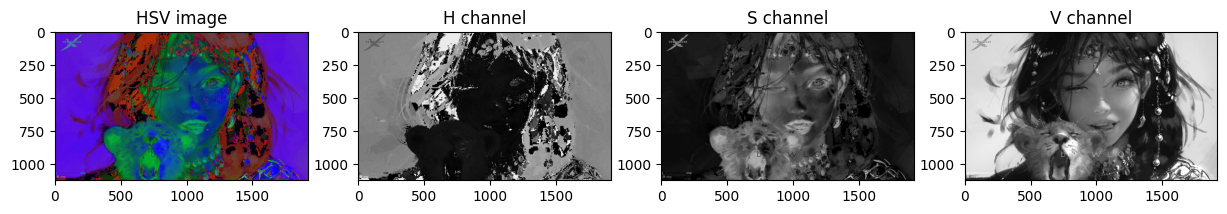

In [6]:
# Create HSV image
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H_channel, S_channel, V_channel = cv2.split(img_hsv)
imshows(
    [img_hsv, H_channel, S_channel, V_channel], 
    titles=['HSV image', 'H channel', 'S channel', 'V channel']
)

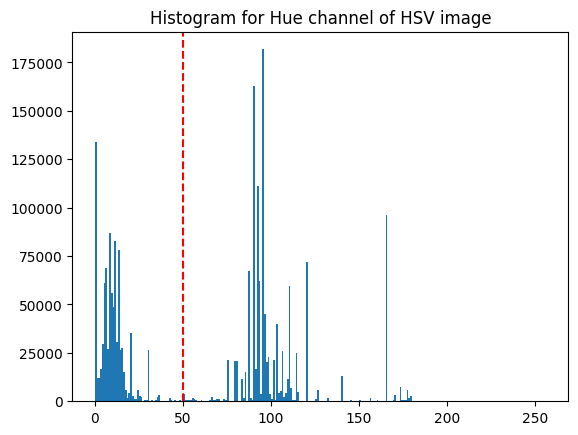

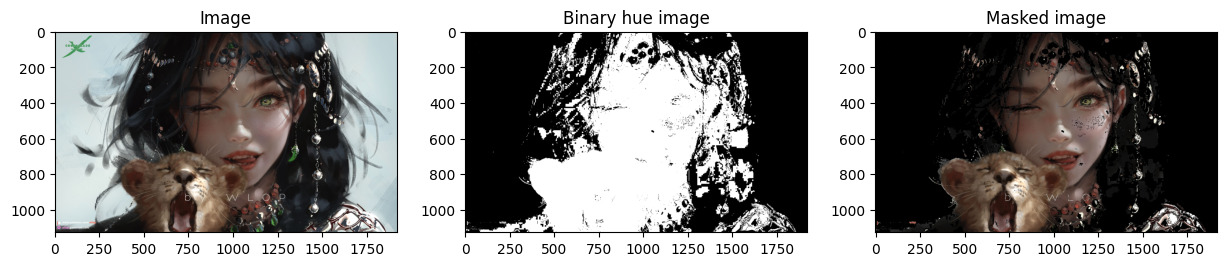

In [7]:
# Show Histogram of Hue Channel
plt.hist(H_channel.ravel(), 256, [0, 256])
plt.title('Histogram for Hue channel of HSV image')
threshold = 50
plt.axvline(x=threshold, linestyle="--", color='r')
plt.show()

binary_hue_img = (H_channel < threshold)
hue_to_rgb = cv2.bitwise_and(img, img, mask=(binary_hue_img).astype(np.uint8))
imshows(
    [img, binary_hue_img, hue_to_rgb], 
    titles=['Image', 'Binary hue image', 'Masked image']
)

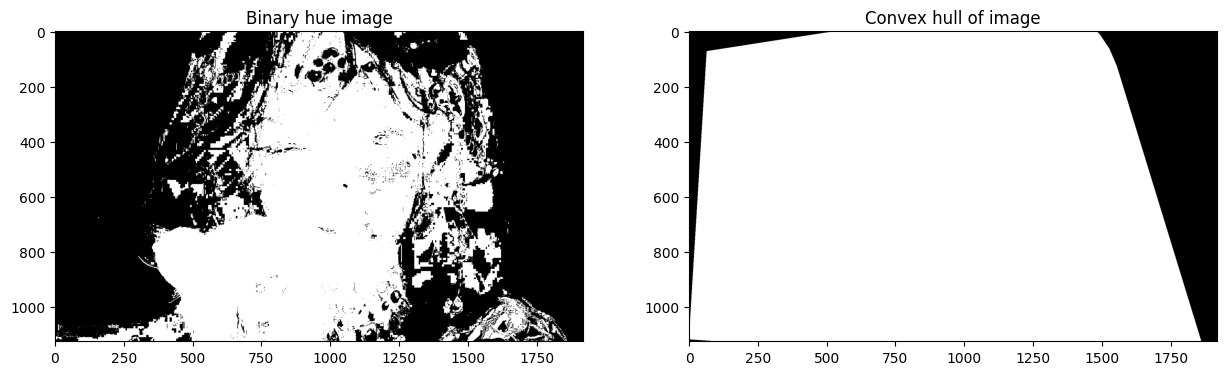

In [8]:
from skimage.morphology import convex_hull_image
# from skimage.util import invert

# Convex hull for the person in image
# binary_hue_img = invert(binary_hue_img)
convex_hull = convex_hull_image(binary_hue_img)
imshows(
    [binary_hue_img, convex_hull],
    titles=['Binary hue image', 'Convex hull of image']
)

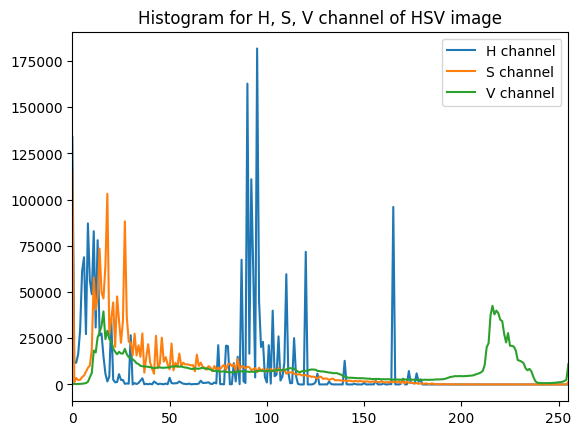

In [9]:
# Histogram for H, S, V channel of HSV image
for channel in range(3):
    hist = cv2.calcHist([img_hsv], [channel], None, [256], [0, 256])
    plt.plot(hist)
    plt.xlim([0, 255])

plt.title('Histogram for H, S, V channel of HSV image')
plt.legend(['H channel', 'S channel', 'V channel'])
plt.show()

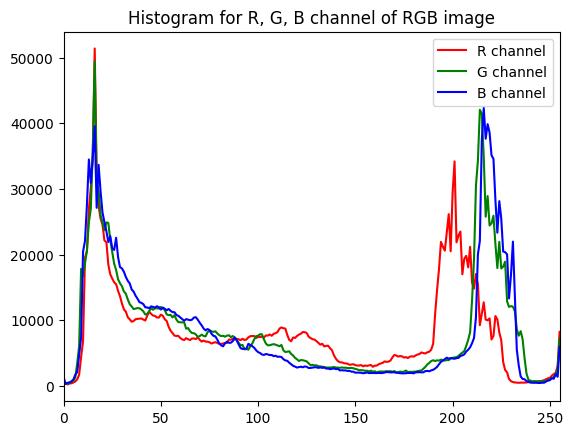

In [10]:
# Histogram for R, G, B channel of RGB image
for channel, color in enumerate(['r', 'g', 'b']):
    hist = cv2.calcHist([img], [channel], None, [256], [0,256])
    plt.plot(hist, color=color)
    plt.xlim([0, 255])

plt.title('Histogram for R, G, B channel of RGB image')
plt.legend(['R channel', 'G channel', 'B channel'])
plt.show()

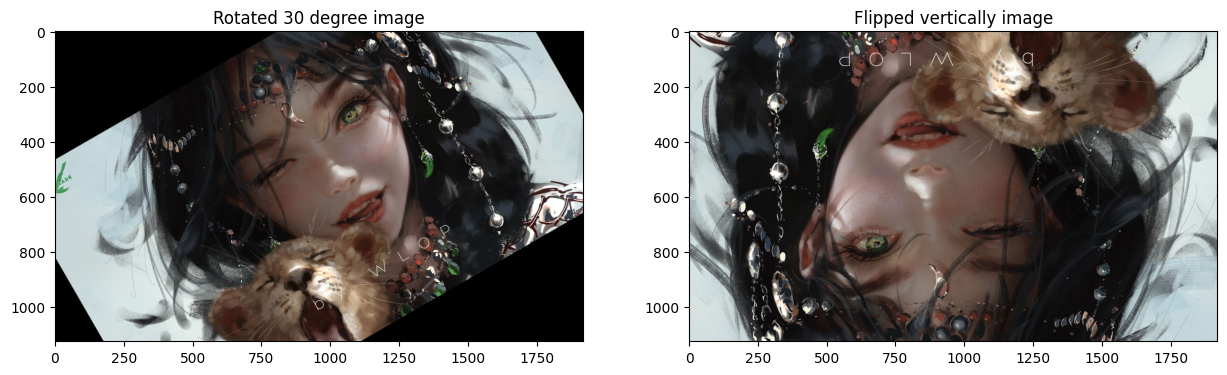

In [11]:
def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]
    if center is None:
        center = (w//2, h//2)

    transform = cv2.getRotationMatrix2D(center, angle, scale)
    rotated   = cv2.warpAffine(image, transform, (w, h))
    return rotated

imshows(
    [rotate(img, 30), rotate(img, 180, center=None, scale=1.25)],
    titles=['Rotated 30 degree image', 'Flipped vertically image']
)

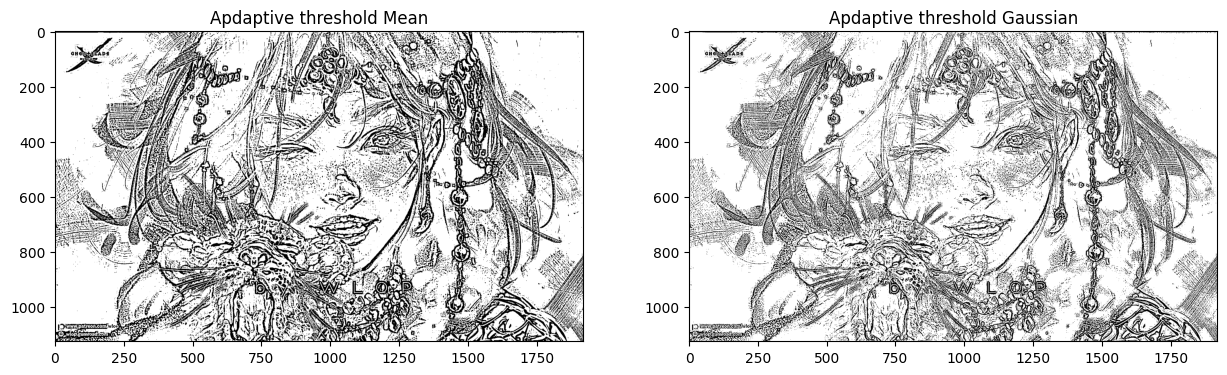

In [12]:
thres_mean = cv2.adaptiveThreshold(
    img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2
)
thres_gaussian = cv2.adaptiveThreshold(
    img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2
)
imshows(
    [thres_mean, thres_gaussian], 
    titles=['Apdaptive threshold Mean', 'Apdaptive threshold Gaussian']
)

# Bài 2.

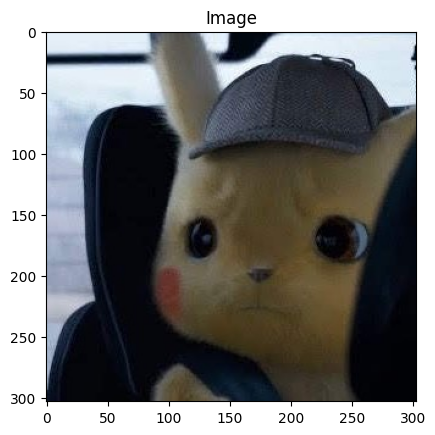

In [13]:
img = plt.imread('images/pikachu.jpg')
imshow(img, 'Image')

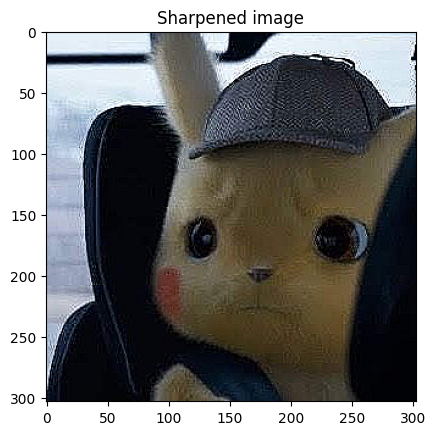

In [14]:
kernel = np.array([[0,-1,0], [-1,5,-1], [0,-1,0]])
img_sharpened = cv2.filter2D(img, -1, kernel)
imshow(img_sharpened, 'Sharpened image')

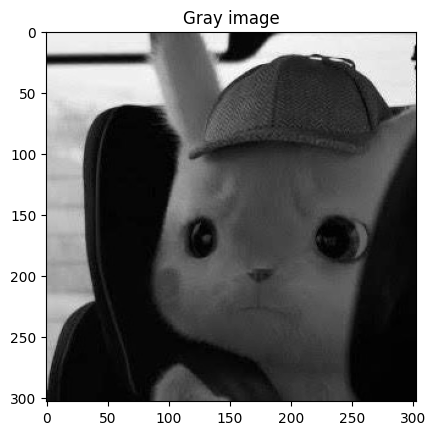

In [15]:
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
imshow(img_gray, 'Gray image')

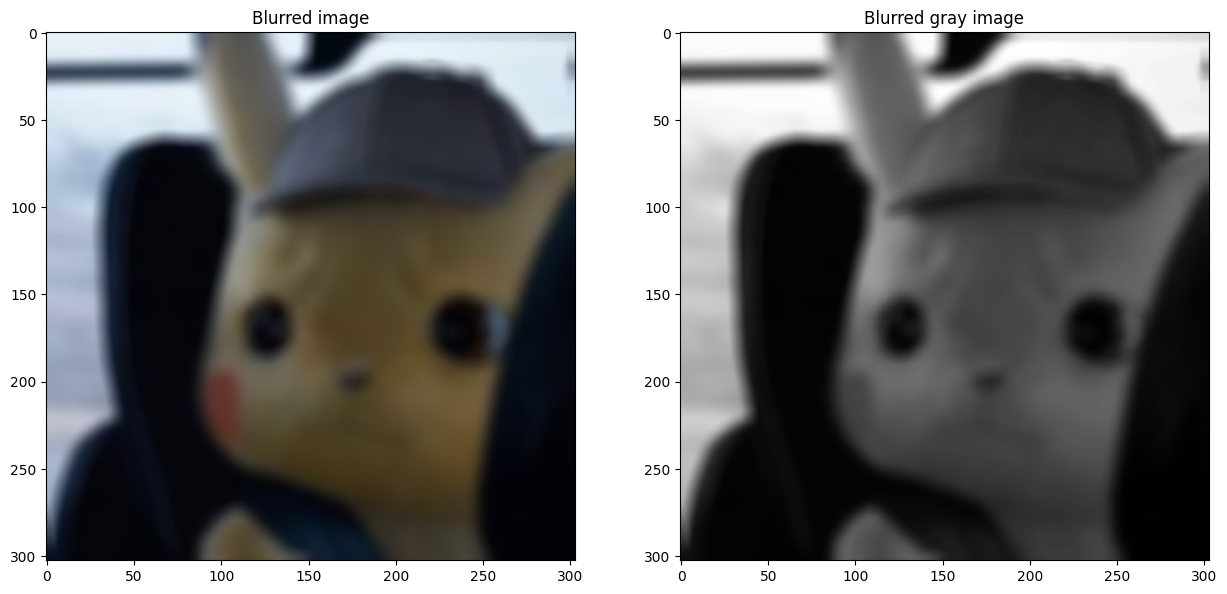

In [16]:
def blur(img):
    img = cv2.blur(img, (10, 10))
    # img = cv2.GaussianBlur(img, (5, 5), 0)
    return img

img_blurred = blur(img_gray)
imshows([blur(img), img_blurred], titles=['Blurred image', 'Blurred gray image'])

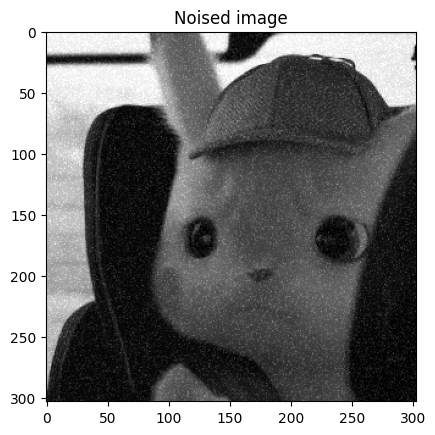

In [17]:
def noise(img):
    # noise = np.random.randint(0, 100, size=img.shape, dtype=np.uint8)
    noise = np.zeros(img.shape, np.uint8)
    cv2.randn(noise, 0, 20)
    return cv2.add(img, noise)

img_noised = noise(img_gray)
imshow(img_noised, 'Noised image')

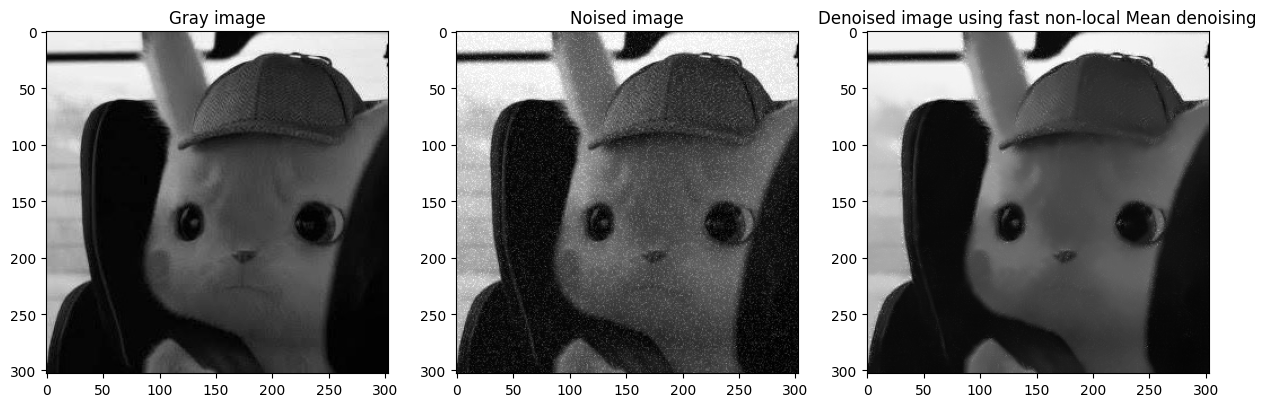

In [18]:
# Denoised image using fast non-local Mean denoising algorithm
denoised_img = cv2.fastNlMeansDenoising(img_noised, None, 10)
imshows(
    [img_gray, img_noised, denoised_img], 
    titles=[
        'Gray image', 'Noised image', 
        'Denoised image using fast non-local Mean denoising'
    ]
)

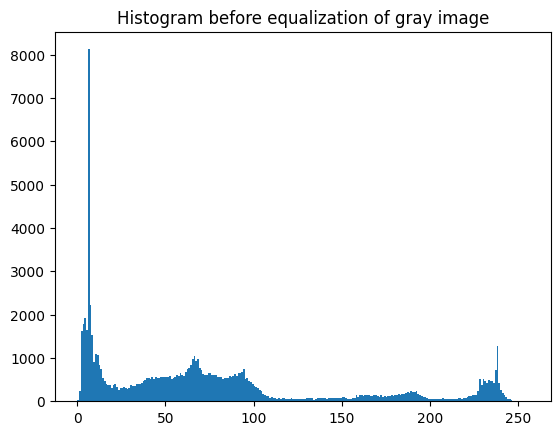

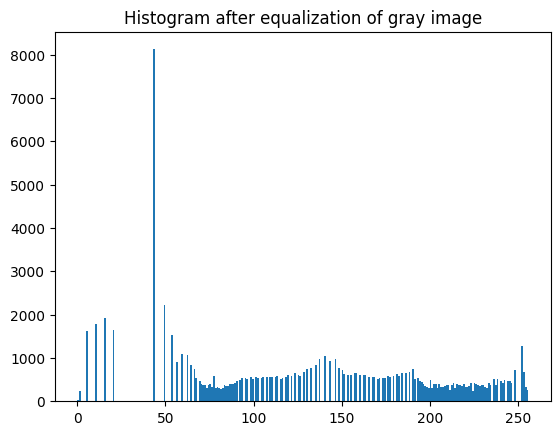

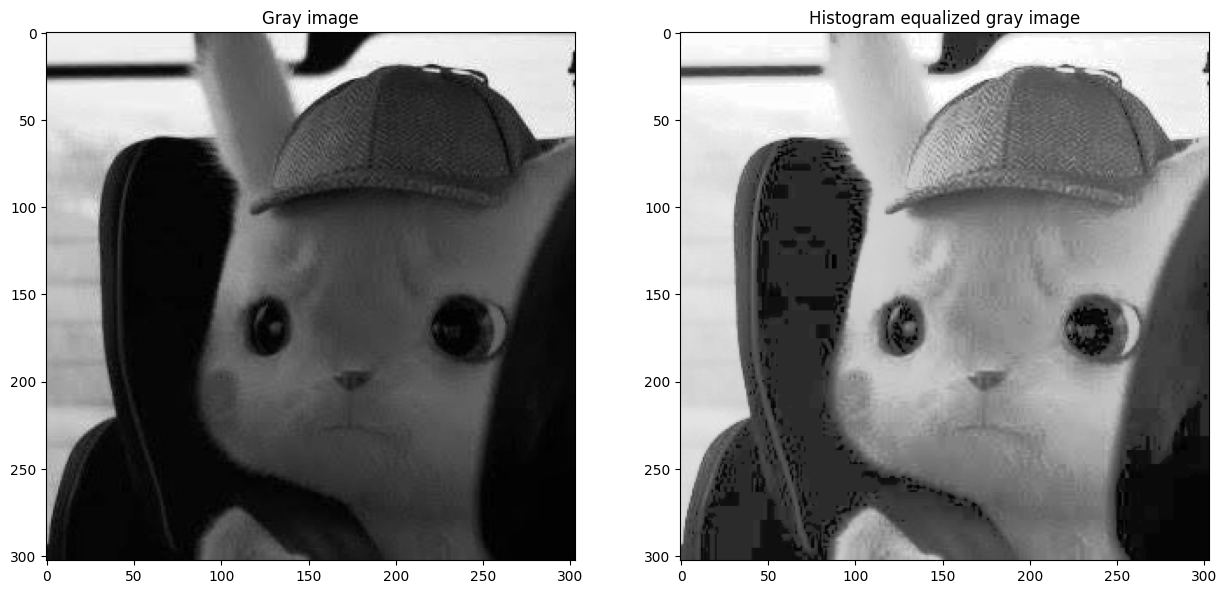

In [19]:
# Show histogram of gray image
plt.hist(img_gray.ravel(), 256, [0, 256])
plt.title('Histogram before equalization of gray image')
plt.show()

# Show histogram of gray image after equalization
equalized = cv2.equalizeHist(img_gray)
plt.hist(equalized.ravel(), 256, [0, 256])
plt.title('Histogram after equalization of gray image')
plt.show()

imshows(
    [img_gray, equalized], 
    titles=['Gray image', 'Histogram equalized gray image']
)

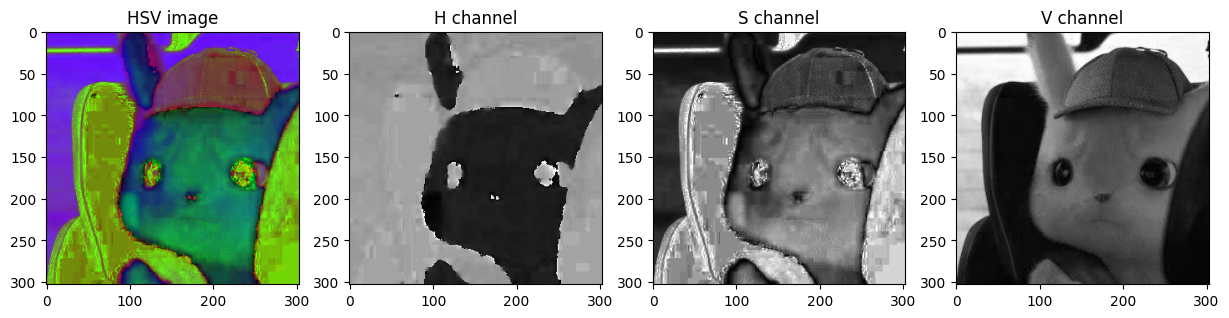

In [20]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H_channel, S_channel, V_channel = cv2.split(img_hsv)
imshows(
    [img_hsv, H_channel, S_channel, V_channel], 
    titles=['HSV image', 'H channel', 'S channel', 'V channel']
)

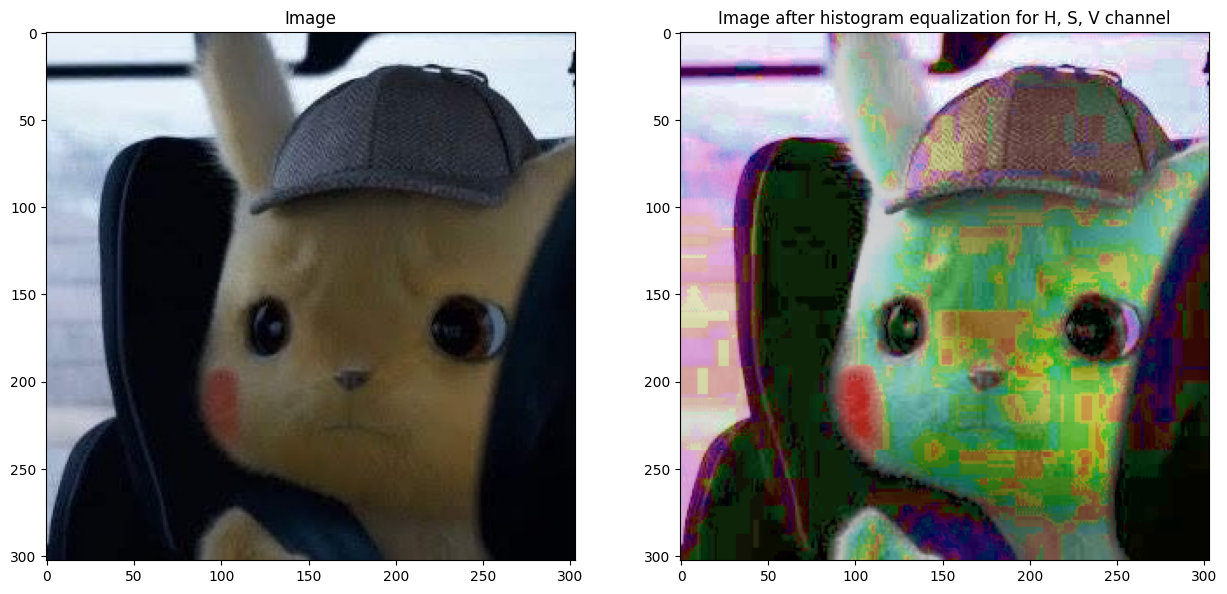

In [21]:
# Histogram equalization for H, S, V channel
h = cv2.equalizeHist(H_channel)
s = cv2.equalizeHist(S_channel)
v = cv2.equalizeHist(V_channel)
equalized_hsv_img = cv2.merge((h, s, v))
equalized_hsv_img_rgb = cv2.cvtColor(equalized_hsv_img, cv2.COLOR_HSV2RGB)
imshows(
    [img, equalized_hsv_img_rgb],
    titles=['Image', 'Image after histogram equalization for H, S, V channel']
)

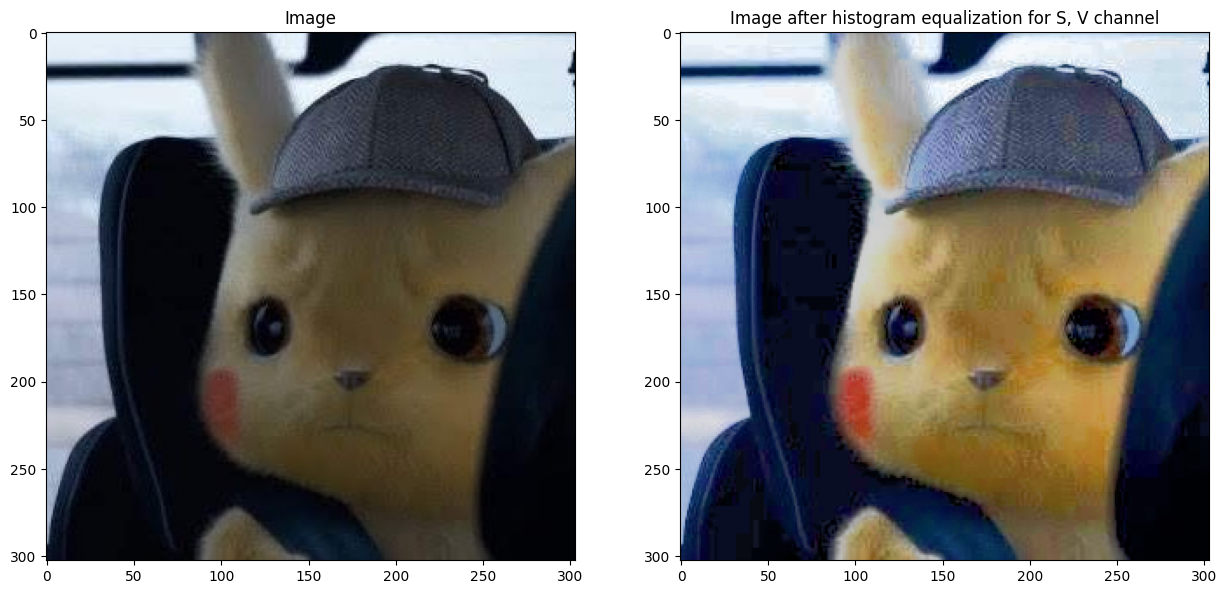

In [22]:
# Enhance image by histogram equalization for S, V channel
s = cv2.equalizeHist(S_channel)
v = cv2.equalizeHist(V_channel)
equalized_hsv_img = cv2.merge((H_channel, s, v))
equalized_hsv_img_rgb = cv2.cvtColor(equalized_hsv_img, cv2.COLOR_HSV2RGB)
imshows(
    [img, equalized_hsv_img_rgb],
    titles=['Image', 'Image after histogram equalization for S, V channel']
)

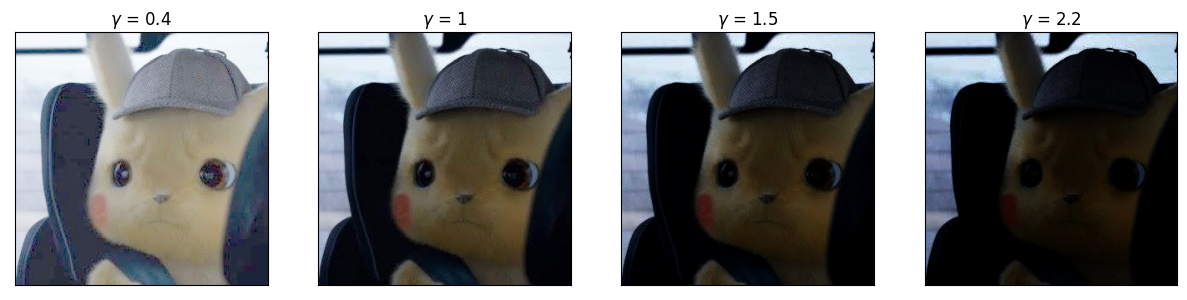

In [23]:
gammas = [0.4, 1, 1.5, 2.2]
gamma_corrected = []
for gamma in gammas:
    gamma_corrected.append(
        np.array((np.power(img/255, gamma)) * 255, dtype='uint8')
    )

imshows(
    gamma_corrected,
    titles=list(map(lambda x: f'$\gamma$ = {x}', gammas)),
    clean=True
)

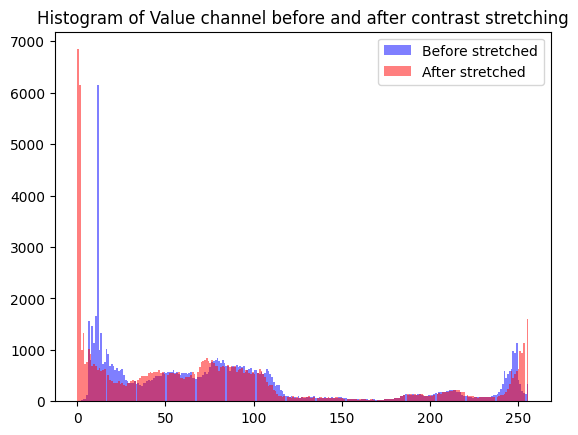

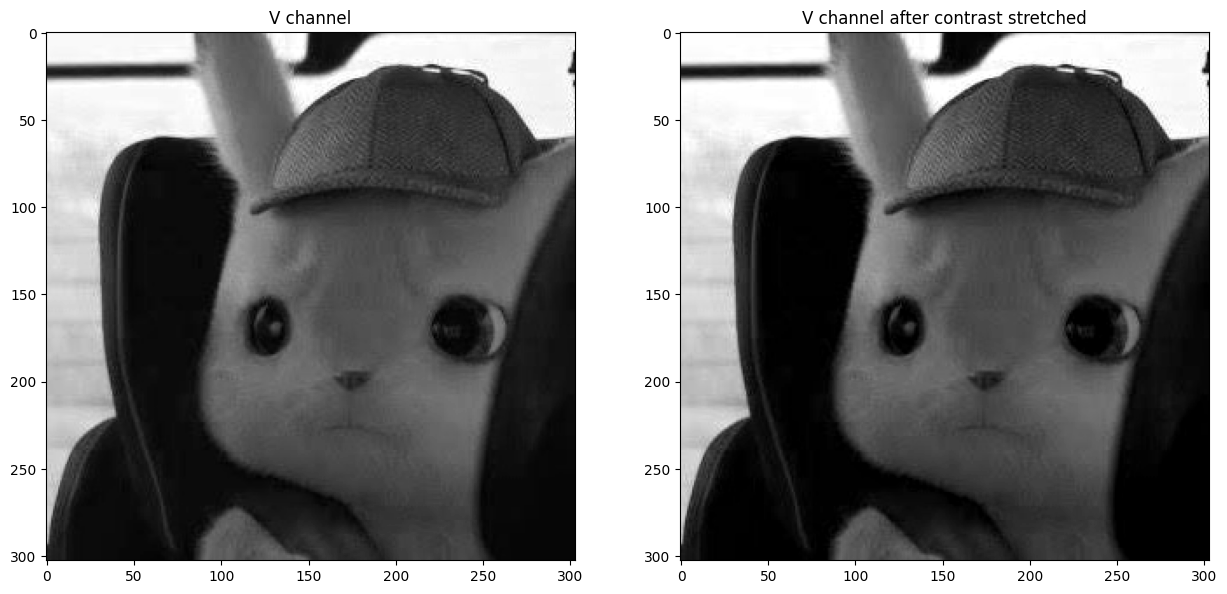

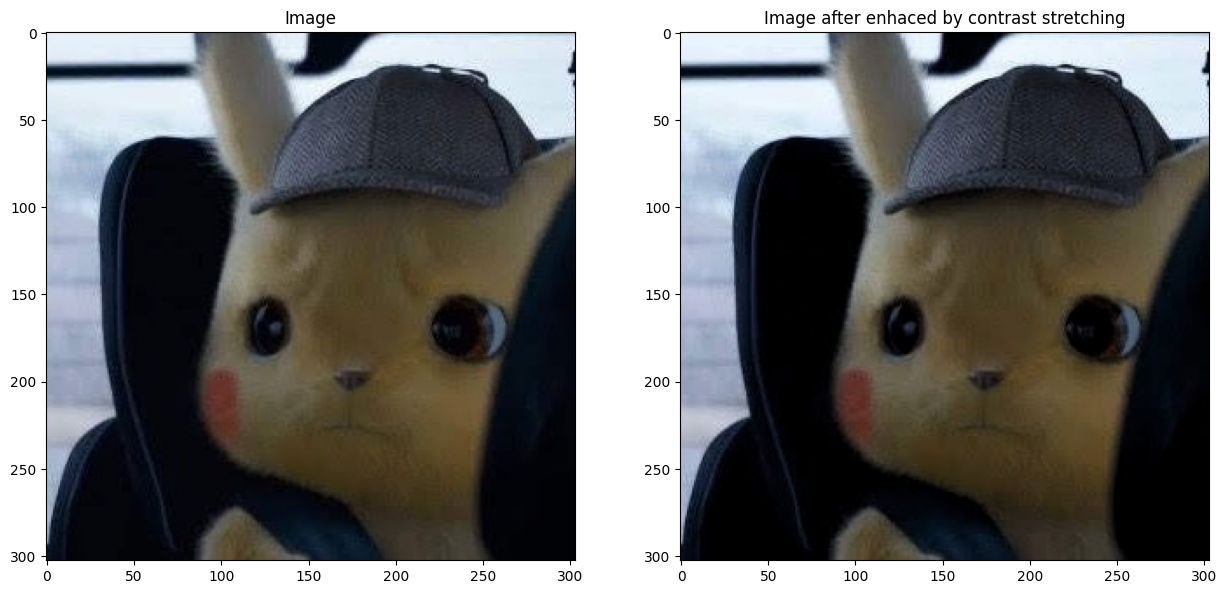

In [24]:
# Constrast stretching
def pixelValueTransformation(pixel, r1, s1, r2, s2): 
    if 0 <= pixel <= r1: 
        return (s1/r1) * pixel
    elif r1 < pixel <= r2: 
        return ((s2 - s1)/(r2 - r1)) * (pixel - r1) + s1 
    else: 
        return ((255 - s2)/(255 - r2)) * (pixel - r2) + s2 

r1, s1 = 10, 0
r2, s2 = 250, 255

contrast_stretching = np.vectorize(pixelValueTransformation) 
contrast_stretched = contrast_stretching(V_channel, r1, s1, r2, s2) 

plt.hist(V_channel.ravel(), 256, [0, 256], alpha=0.5, color='blue')
plt.hist(contrast_stretched.ravel(), 256, [0, 256], alpha=0.5, color='red')
plt.title('Histogram of Value channel before and after contrast stretching')
plt.legend(['Before stretched', 'After stretched'])
plt.show()

img_hsv[:, :, 2] = contrast_stretched
image_enhanced = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)
imshows(
    [V_channel, contrast_stretched], 
    titles=['V channel', 'V channel after contrast stretched']
)
imshows(
    [img, image_enhanced],
    titles=['Image', 'Image after enhaced by contrast stretching']
)

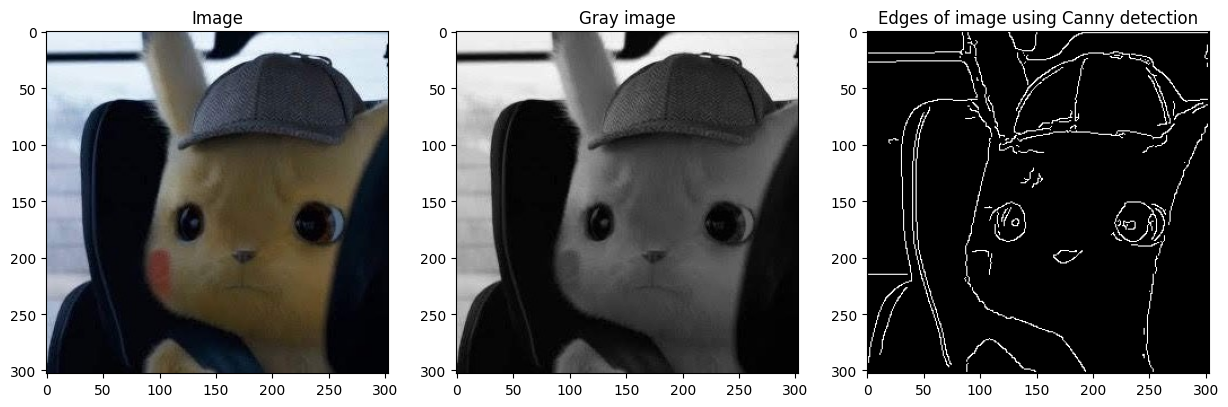

In [25]:
from skimage.feature import canny

edges = canny(img_gray)
imshows(
    [img, img_gray, edges], 
    titles=['Image', 'Gray image', 'Edges of image using Canny detection']
)